<a href="https://colab.research.google.com/github/dawoodwasif/Digital-Image-Processing-Techniques/blob/main/DIP_Lab8_Spatial_Filtering_Basics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task #1: **Effect of averaging and the size of averaging filters**

In [ ]:
#necessary imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

#function which takes input numpy array of image and size and returns a smoothened and filtered image
def box_average(img, size):
  fimg = img.copy() #make a copy of input image
  padding = (size-1)//2 #find size of padding at each sides
  kernel = np.ones((size,size),np.float32)/(size**2) #define a kernel to be applied over the image
  row,col = img.shape[:2] #find and store shape of image
  img2 = cv2.copyMakeBorder(img, padding, padding, padding, padding,cv2.BORDER_CONSTANT, (0,0,0)) # add zero padding at each side

  #double for loop to access each pixel in image
  for i in range(row):
    for j in range(col):
      region = img2[i:i+size, j:j+size] #extract a region from zero padded image
      fimg[i,j]= np.multiply(kernel, region).sum() # apply the filter on the region and store output in the particular pixel
  return fimg  #return the final filtered numpy array of the image

#read image into input
input = cv2.imread('smoothing.tif', cv2.IMREAD_GRAYSCALE)

#store output image arrays
output1 = box_average(input, 3)
output2 = box_average(input, 5)
output3 = box_average(input, 15)
output4 = box_average(input, 35)

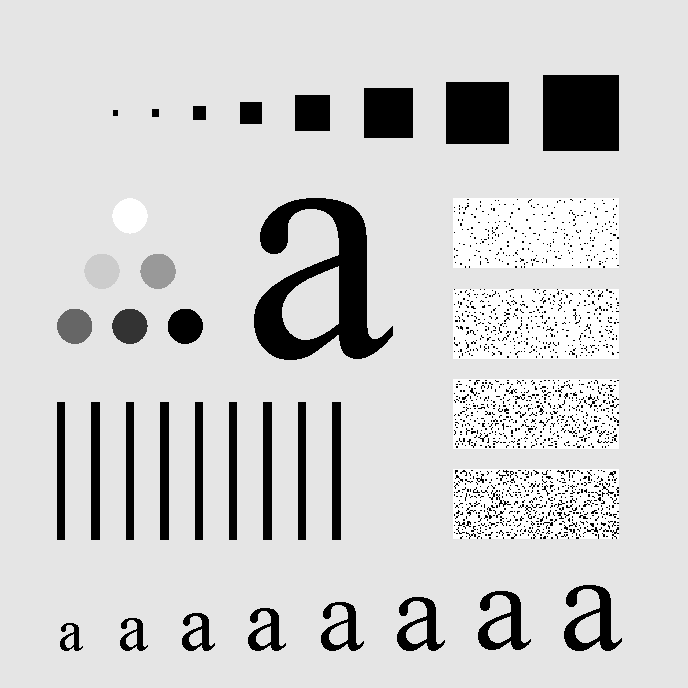

In [ ]:
Image.fromarray(input)

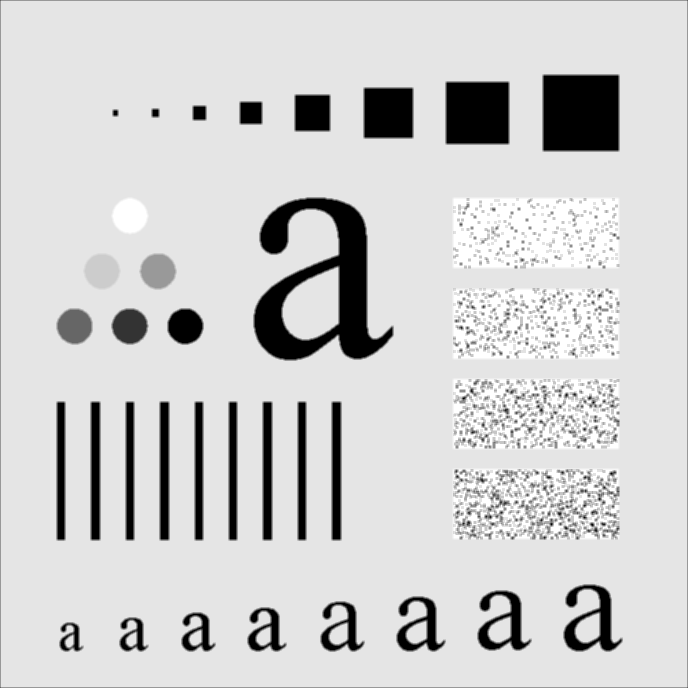

In [ ]:
Image.fromarray(output1)

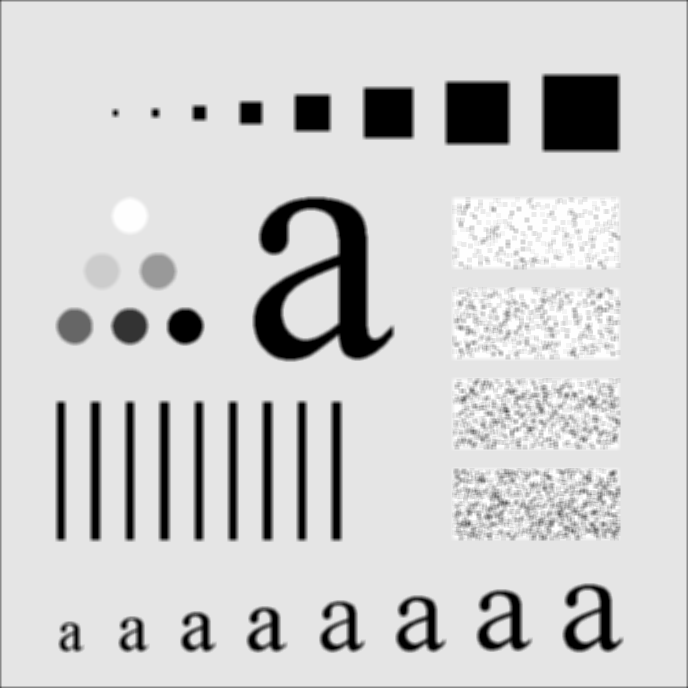

In [ ]:
Image.fromarray(output2)

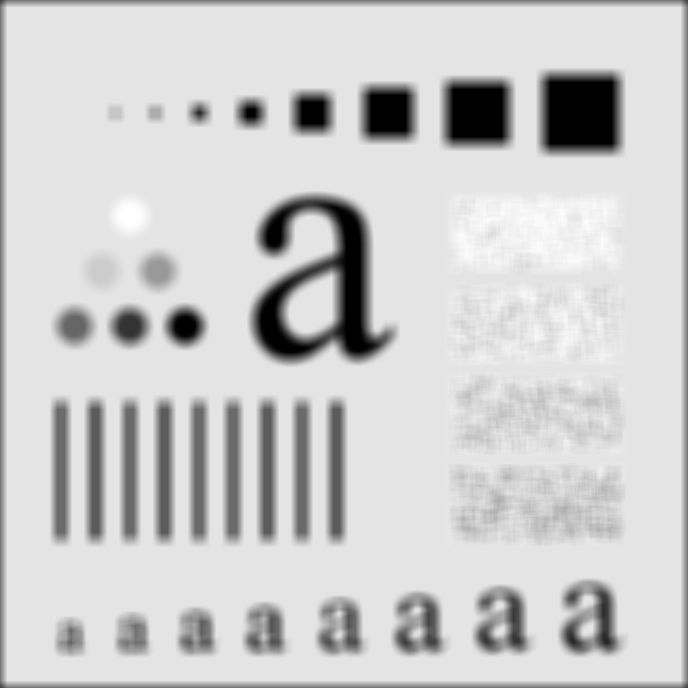

In [ ]:
Image.fromarray(output3)

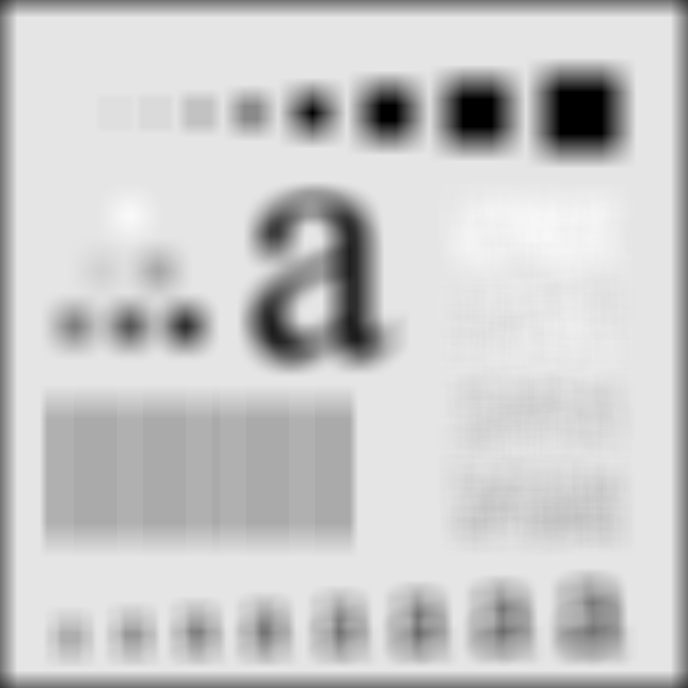

In [ ]:
Image.fromarray(output4)

In [ ]:
#function which takes input numpy array of image and a kernel and returns a smoothened and filtered image
def weighted_average(img, kernel):
  fimg = img.copy() #make a copy of input image
  size = kernel.shape[1] #since both sides of kernel are same, use either side
  padding = (size-1)//2 #find size of padding at each sides
  row,col = img.shape[:2] #find and store shape of image
  img2 = cv2.copyMakeBorder(img, padding, padding, padding, padding,cv2.BORDER_CONSTANT, (0,0,0)) # add zero padding at each side

 #double for loop to access each pixel in image
  for i in range(row):
    for j in range(col):
      region = img2[i:i+size, j:j+size] #extract a region from zero padded image
      fimg[i,j]= np.multiply(kernel, region).sum() # apply the filter on the region and store output in the particular pixel
  return fimg  #return the final filtered numpy array of the image

#use pre-defined kernel given in lab
kernel1 = np.array([
                [1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]
                ]) / 16

#custom defined kernels for testing
kernel2 = np.array([
                [4, 4, 8, 4, 4],
                [4, 4, 8, 4, 4],
                [8, 8, 2, 8, 8],
                [4, 4, 8, 4, 4],
                [4, 4, 8, 4, 4]
                ]) / 130
kernel3 = np.array([
                [0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0]
                ]) / 1

#store output arrays from functi
output7 = weighted_average(input, kernel3)
output5 = weighted_average(input, kernel1)
output6 = weighted_average(input, kernel2)

print(input.shape)

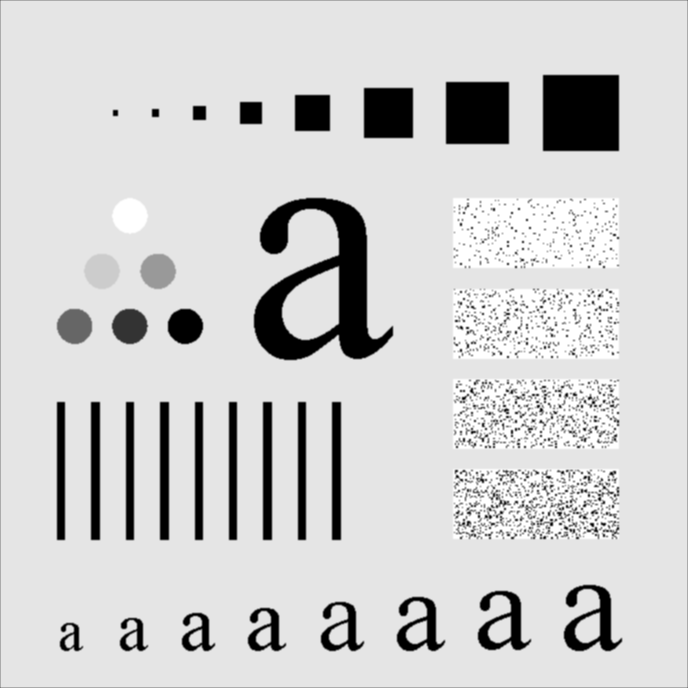

In [ ]:
Image.fromarray(output5)

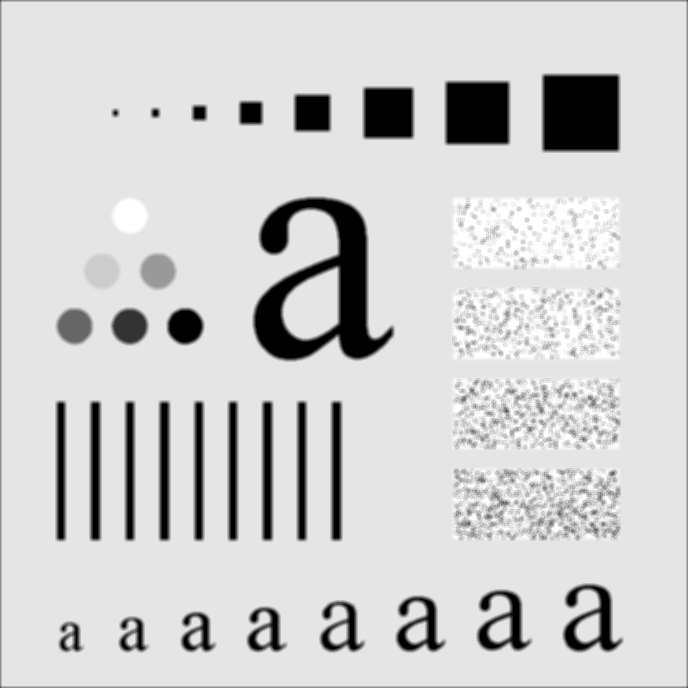

In [ ]:
Image.fromarray(output6)

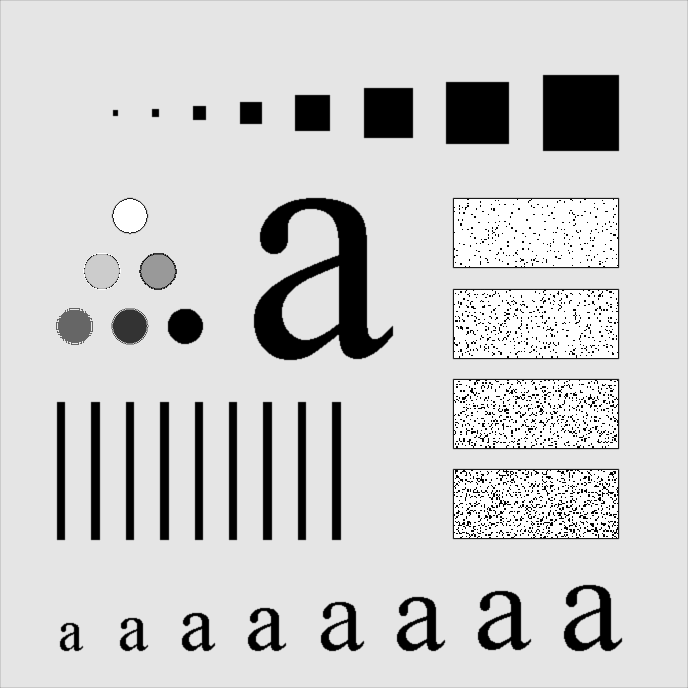

In [ ]:
Image.fromarray(output7)

## Task #2: **Gaussian smoothing**

In [ ]:
#neccessary import
import math

#function to calculate gaussian value with standard deviation and x and y radius
def gaussian(radius1,radius2, sd):
  den = 2 * math.pi * (sd**2) #calculate denominator value
  num =  math.e ** (-(((radius1**2) + (radius2**2)) /(2 * (sd**2)))) ##calculate numerator value
  return num/den # return final calculated value

#function which takes input array of image, size, standard deviation and returns gaussian filtered array of image
def gaussian_filter(img, size, sd):
  fimg = img.copy() #make a copy of input image
  kernel = np.ones((size,size), np.float32) #create a kernel with given size to be filed later
  padding = (size-1)//2 #find size of padding at each sides

  #use double for loop to access each pixel in kernel  
  for k in range(size):
      for l in range(size):
        x = abs(k - padding) #vertical distance from oriigin
        y = abs(l - padding) #horizontal distance from origin
        kernel[k,l] = (gaussian(x,y, sd)) #store values in kernel

  kernel = kernel/ kernel.sum()#normalizing factor

  row,col = img.shape[:2] #store shape of input image
  img2 = cv2.copyMakeBorder(img, padding, padding, padding, padding,cv2.BORDER_CONSTANT, (0,0,0)) #add zero padding at each sides of input image
 
  #double for loop to access each pixel in image
  for i in range(row):
    for j in range(col):
      region = img2[i:i+size, j:j+size] #extract a region from zero padded image
      fimg[i,j]= np.multiply(kernel, region).sum() # apply the filter on the region and store output in the particular pixel
  return fimg  #return the final filtered numpy array of the image

#store output arrays of image
output7 = gaussian_filter(input, 7, 1.4)
output8 = gaussian_filter(input, 7, 3)
output9 = gaussian_filter(input, 7, 5)
output10 = gaussian_filter(input, 7, 10)

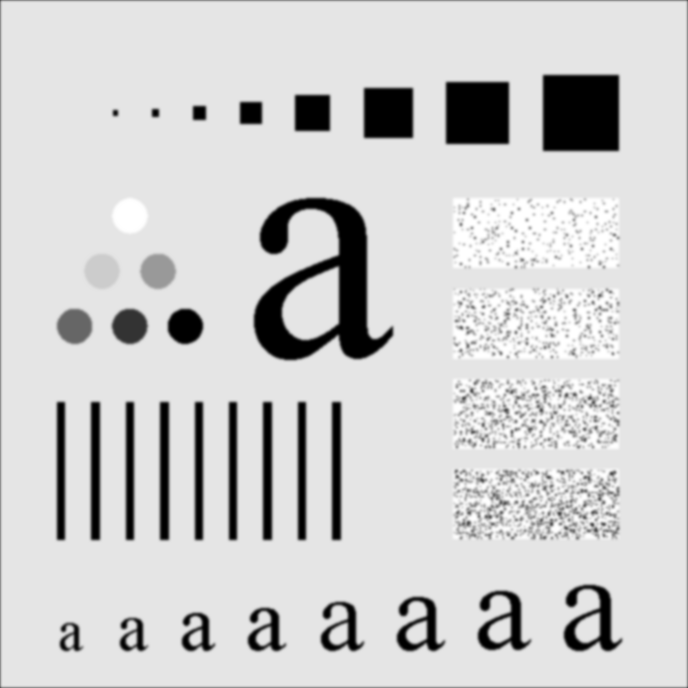

In [ ]:
Image.fromarray(output7)

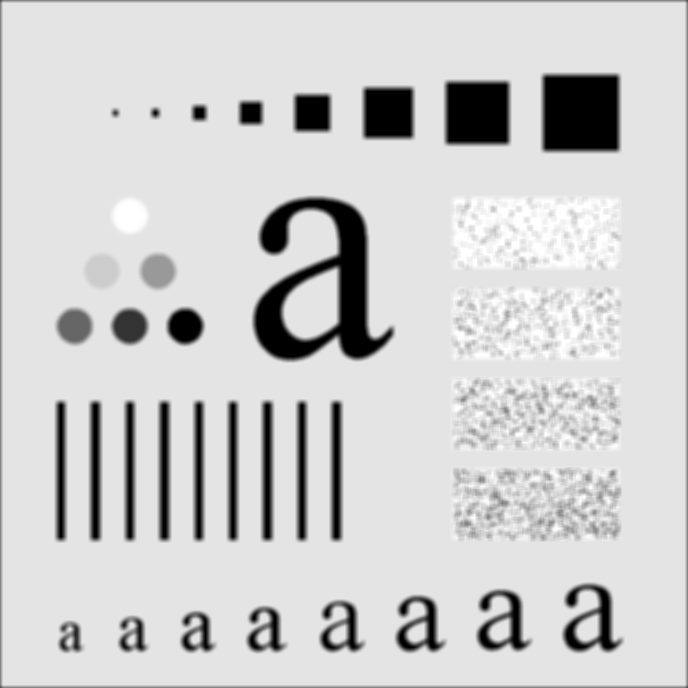

In [ ]:
Image.fromarray(output8)

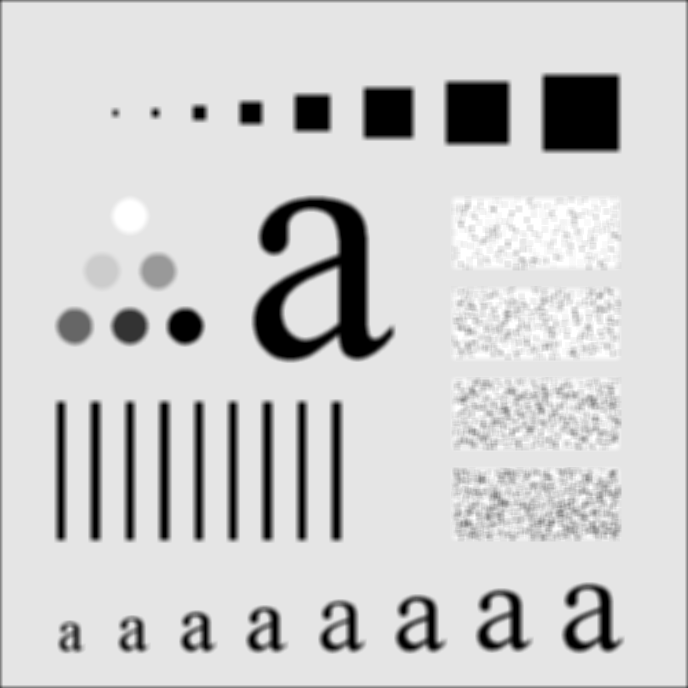

In [ ]:
Image.fromarray(output9)

In [ ]:
#kernel given in lab
x = np.array([
                [1, 1, 2, 2, 2, 1, 1],
                [1, 2, 2, 4, 2, 2, 1],
                [2, 2, 4, 8, 3, 2, 2],
                [2, 4, 8, 16, 8, 4, 2],
                [2, 2, 4, 8, 3, 2, 2],
                [1, 2, 2, 4, 2, 2, 1],
                [1, 1, 2, 2, 2, 1, 1]
                ])
#normalize kernel
x = x / x.sum()
output10 = weighted_average(input, x)

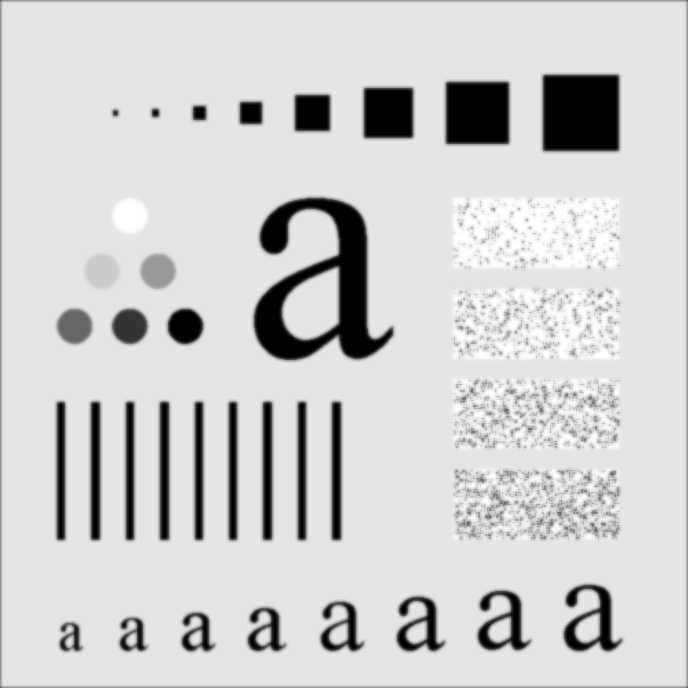

In [ ]:
Image.fromarray(output10)